# Phase 4: Exploratory Data Analysis (EDA)

Goals:
- Understand distributions & fraud patterns
- Validate known fraud signals (late night, distance, seasonality, age)
- Identify strong predictors for modeling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style for better visuals
sns.set_theme(style="whitegrid")          # ← changed here
sns.set_palette("viridis")       # this still works fine

# Load the processed file
PROCESSED_PATH = '../data/processed/train_processed.csv'
df = pd.read_csv(PROCESSED_PATH)

# Quick check
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print("\nFirst 3 rows:")
display(df.head(3))

print("\nFraud rate:", df['is_fraud'].mean() * 100, "%")

Shape: (1296675, 28)
Columns: ['trans_date_trans_time', 'category', 'amt', 'log_amt', 'trans_hour', 'is_late_night', 'trans_month', 'is_holiday_season', 'distance_km', 'time_since_last_trans', 'count_30_days', 'count_7_days', 'count_1_day', 'age_at_trans', 'age_bin', 'is_fraud', 'gender', 'lat', 'long', 'city_pop', 'dob', 'merch_lat', 'merch_long', 'trans_dayofweek', 'is_night', 'usual_lat', 'usual_long', 'distance_from_usual_km']

First 3 rows:


,trans_date_trans_time,category,amt,log_amt,trans_hour,is_late_night,trans_month,is_holiday_season,distance_km,time_since_last_trans,...,long,city_pop,dob,merch_lat,merch_long,trans_dayofweek,is_night,usual_lat,usual_long,distance_from_usual_km
0,2019-01-01 12:47:15,misc_net,7.27,2.112635,12,0,1,0,127.606239,0.000000,...,-108.8964,1645,1986-02-17,43.974711,-109.741904,1,0,43.974711,-109.741904,0.000000
1,2019-01-02 08:44:57,gas_transport,52.94,3.987872,8,0,1,0,110.308921,19.961667,...,-108.8964,1645,1986-02-17,42.018766,-109.044172,2,0,43.974711,-109.741904,224.769219
2,2019-01-02 08:47:36,gas_transport,82.08,4.419804,8,0,1,0,21.787261,0.044167,...,-108.8964,1645,1986-02-17,42.961335,-109.157564,2,0,42.996738,-109.393038,19.556262



Fraud rate: 0.5788651743883394 %


## Overview Plots


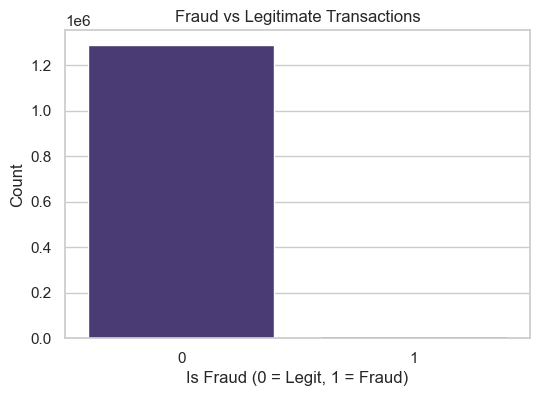

Exact fraud percentage: 0.5789 %


In [2]:
# 1. Fraud vs Non-Fraud count (bar plot)
plt.figure(figsize=(6,4))
sns.countplot(x='is_fraud', data=df)
plt.title('Fraud vs Legitimate Transactions')
plt.xlabel('Is Fraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

print("Exact fraud percentage:", round(df['is_fraud'].mean() * 100, 4), "%")

## Time-based Patterns


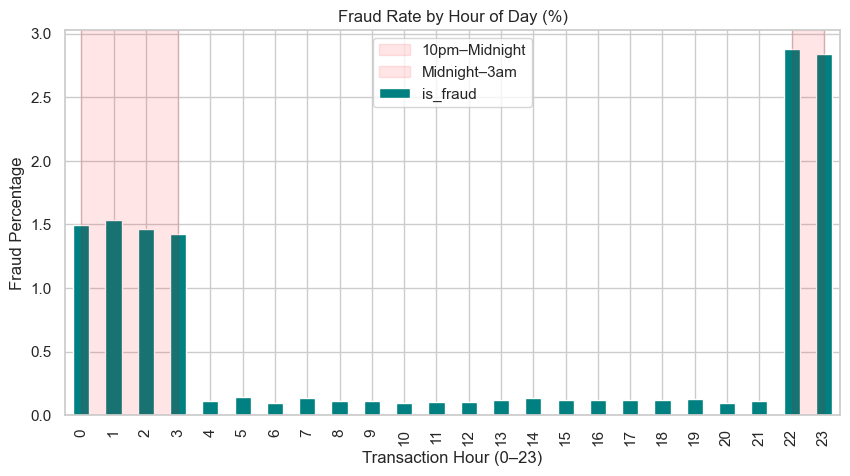

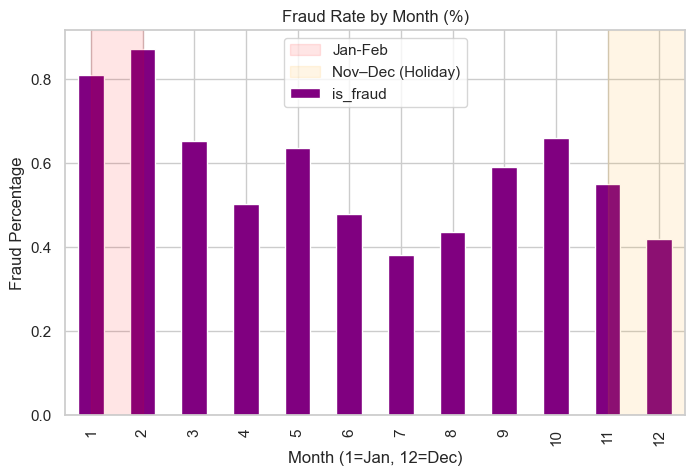

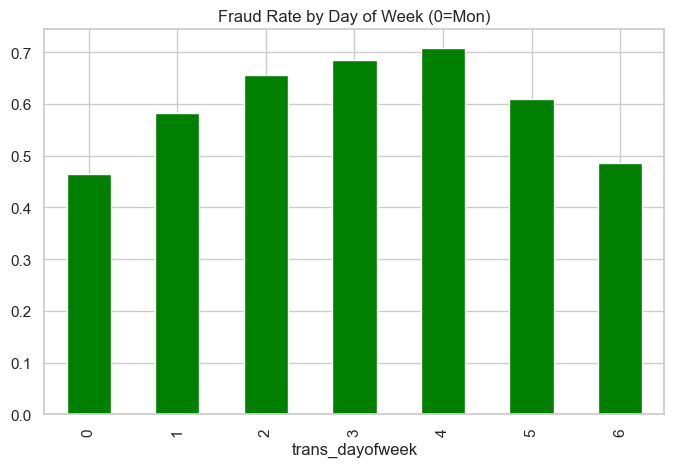

In [3]:
# Fraud rate by hour of day
hour_fraud = df.groupby('trans_hour')['is_fraud'].mean() * 100

plt.figure(figsize=(10,5))
hour_fraud.plot(kind='bar', color='teal')
plt.title('Fraud Rate by Hour of Day (%)')
plt.xlabel('Transaction Hour (0–23)')
plt.ylabel('Fraud Percentage')
plt.axvspan(22, 23, color='red', alpha=0.1, label='10pm–Midnight')
plt.axvspan(0, 3, color='red', alpha=0.1, label='Midnight–3am')
plt.legend()
plt.show()

# Fraud rate by month
month_fraud = df.groupby('trans_month')['is_fraud'].mean() * 100

plt.figure(figsize=(8,5))
month_fraud.plot(kind='bar', color='purple')
plt.title('Fraud Rate by Month (%)')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Fraud Percentage')
plt.axvspan(0, 1, color='red', alpha=0.1, label='Jan-Feb')
plt.axvspan(10, 11.9, color='orange', alpha=0.1, label='Nov–Dec (Holiday)')
plt.legend()
plt.show()

# Optional: by day of week
dow_fraud = df.groupby('trans_dayofweek')['is_fraud'].mean() * 100
plt.figure(figsize=(8,5))
dow_fraud.plot(kind='bar', color='green')
plt.title('Fraud Rate by Day of Week (0=Mon)')
plt.show()

## Distance & Amount Pas

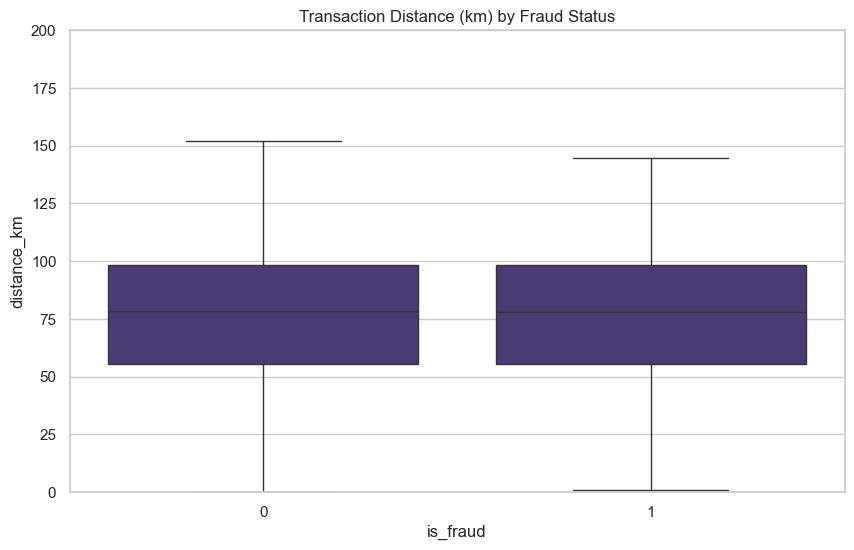

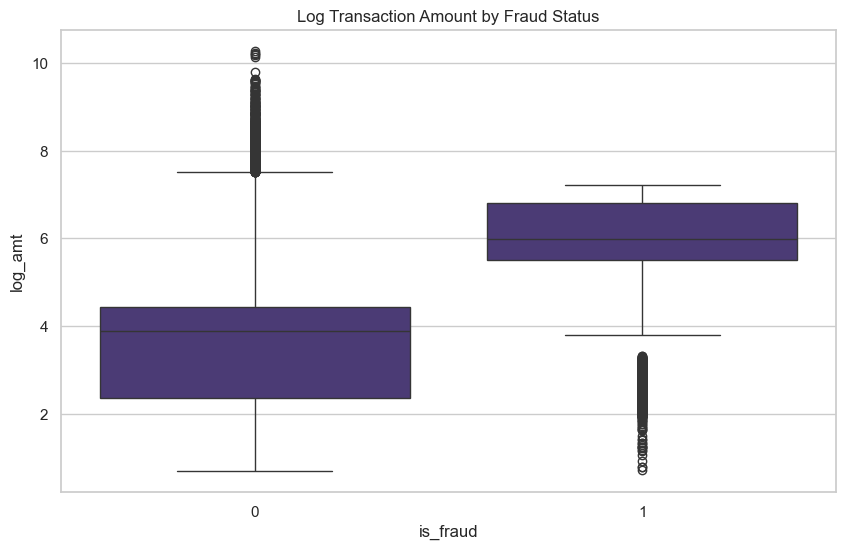

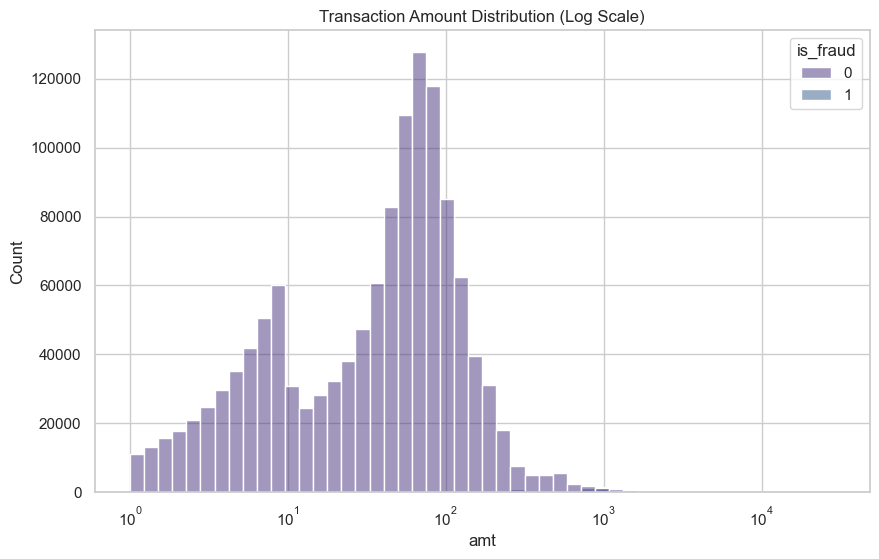

In [4]:
# Fraud vs legit distance distribution (boxplot or hist)
plt.figure(figsize=(10,6))
sns.boxplot(x='is_fraud', y='distance_km', data=df)
plt.title('Transaction Distance (km) by Fraud Status')
plt.ylim(0, 200)  # zoom in — most distances are small
plt.show()

# Log amount by fraud
plt.figure(figsize=(10,6))
sns.boxplot(x='is_fraud', y='log_amt', data=df)
plt.title('Log Transaction Amount by Fraud Status')
plt.show()

# Or histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=50, log_scale=True)
plt.title('Transaction Amount Distribution (Log Scale)')
plt.show()

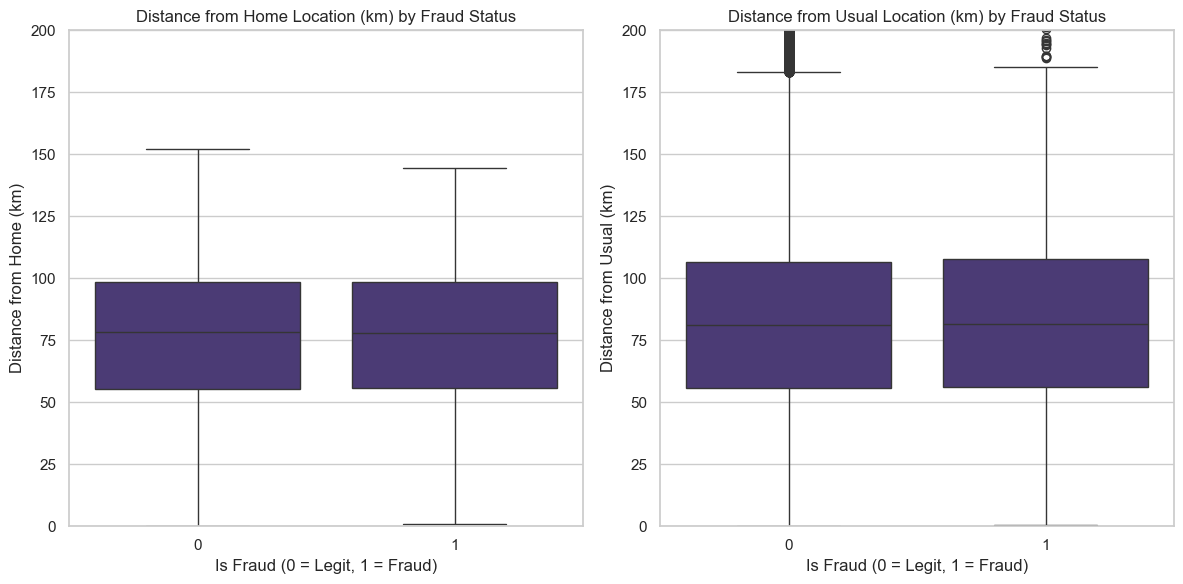

In [5]:
# Boxplot comparison: Distance from home vs Distance from usual location
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='is_fraud', y='distance_km', data=df)
plt.title('Distance from Home Location (km) by Fraud Status')
plt.ylim(0, 200)
plt.xlabel('Is Fraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Distance from Home (km)')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='distance_from_usual_km', data=df)
plt.title('Distance from Usual Location (km) by Fraud Status')
plt.ylim(0, 200)
plt.xlabel('Is Fraud (0 = Legit, 1 = Fraud)')
plt.ylabel('Distance from Usual (km)')

plt.tight_layout()
plt.show()

## Categorical Patterns

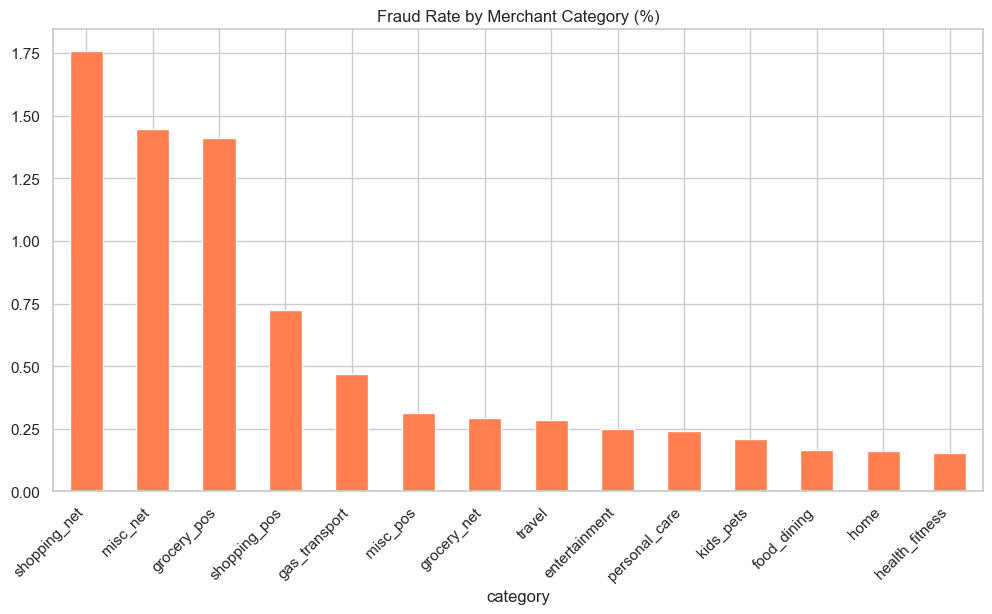

In [6]:
# Fraud rate by merchant category
cat_fraud = df.groupby('category')['is_fraud'].mean() * 100
cat_fraud = cat_fraud.sort_values(ascending=False)

plt.figure(figsize=(12,6))
cat_fraud.plot(kind='bar', color='coral')
plt.title('Fraud Rate by Merchant Category (%)')
plt.xticks(rotation=45, ha='right')
plt.show()

## Age-based Patterns

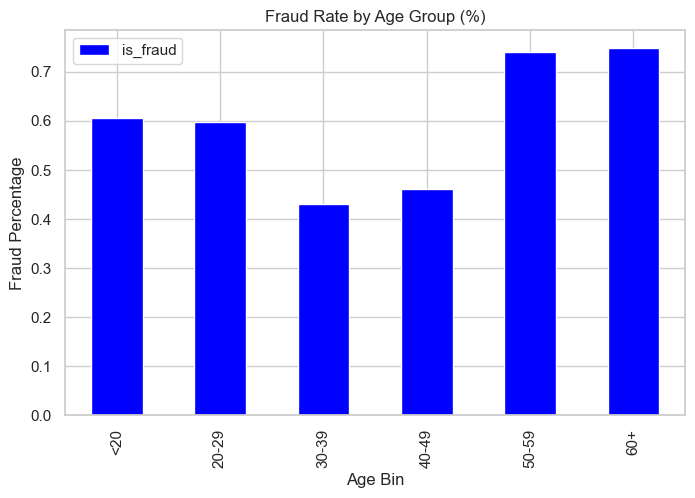

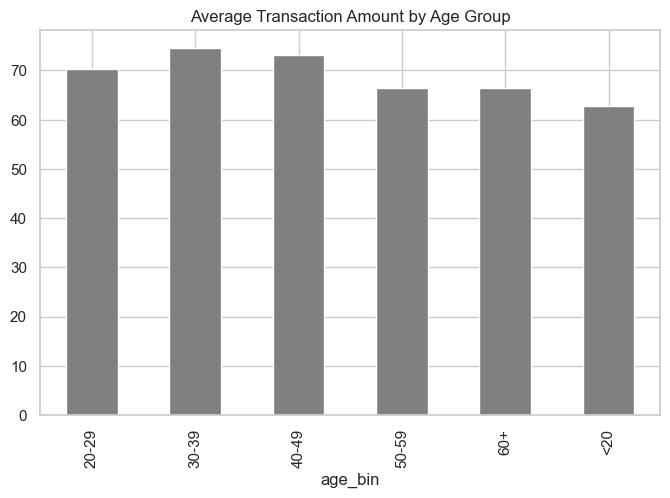

In [7]:
age_order = ['<20', '20-29', '30-39', '40-49', '50-59', '60+']

# Fraud rate by age bin
agebin_fraud = df.groupby('age_bin')['is_fraud'].mean() * 100

plt.figure(figsize=(8,5))
agebin_fraud.reindex(age_order).plot(kind='bar', color='blue')
plt.title('Fraud Rate by Age Group (%)')
plt.xlabel('Age Bin')
plt.ylabel('Fraud Percentage')
#plt.axvspan(1, 2.9, color='yellow', alpha=0.2, label='30–39')
plt.legend()
plt.show()

# Average amount (proxy for loss) by age bin
age_amt = df.groupby('age_bin')['amt'].mean()

plt.figure(figsize=(8,5))
age_amt.plot(kind='bar', color='gray')
plt.title('Average Transaction Amount by Age Group')
plt.show()

## Correlation Heatmap

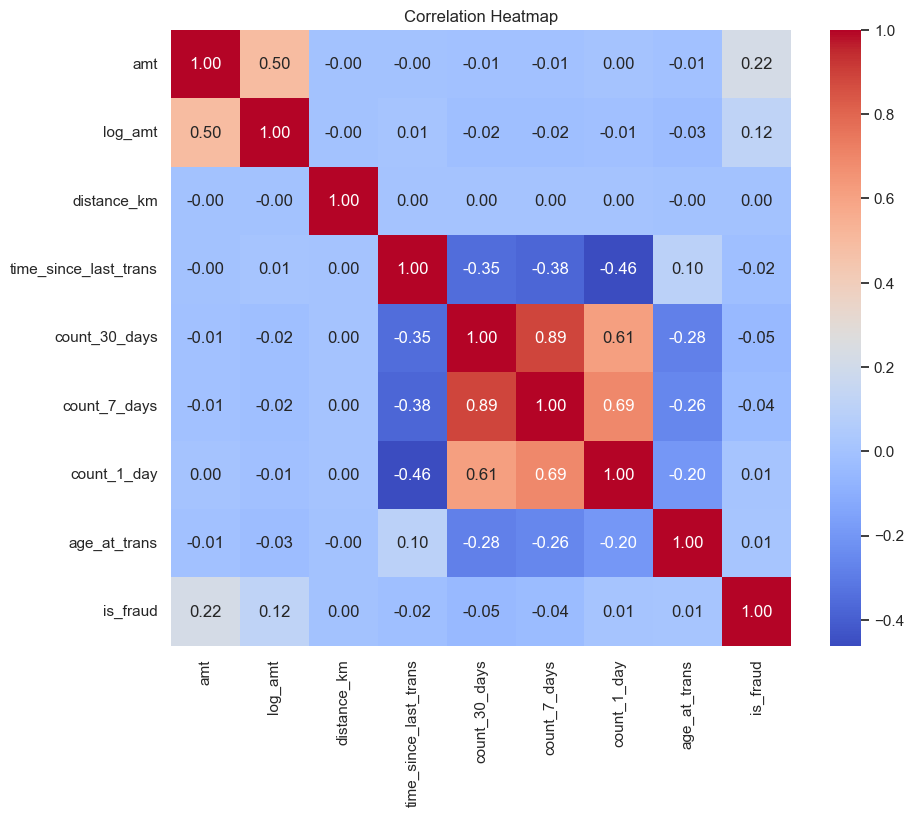

In [8]:
# Select numeric columns
num_cols = ['amt', 'log_amt', 'distance_km', 'time_since_last_trans', 
            'count_30_days', 'count_7_days', 'count_1_day', 
            'age_at_trans', 'is_fraud']

corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Top correlations with is_fraud:
 is_fraud                  1.000000
amt                       0.219404
log_amt                   0.120439
is_night                  0.096583
count_30_days             0.046523
is_late_night             0.046242
count_7_days              0.036301
distance_from_usual_km    0.019630
time_since_last_trans     0.018274
trans_hour                0.013799
age_at_trans              0.012453
trans_month               0.012409
count_1_day               0.008638
is_holiday_season         0.006719
city_pop                  0.002136
lat                       0.001894
usual_lat                 0.001826
merch_lat                 0.001741
trans_dayofweek           0.001739
merch_long                0.001721
long                      0.001721
usual_long                0.001628
distance_km               0.000403
Name: is_fraud, dtype: float64


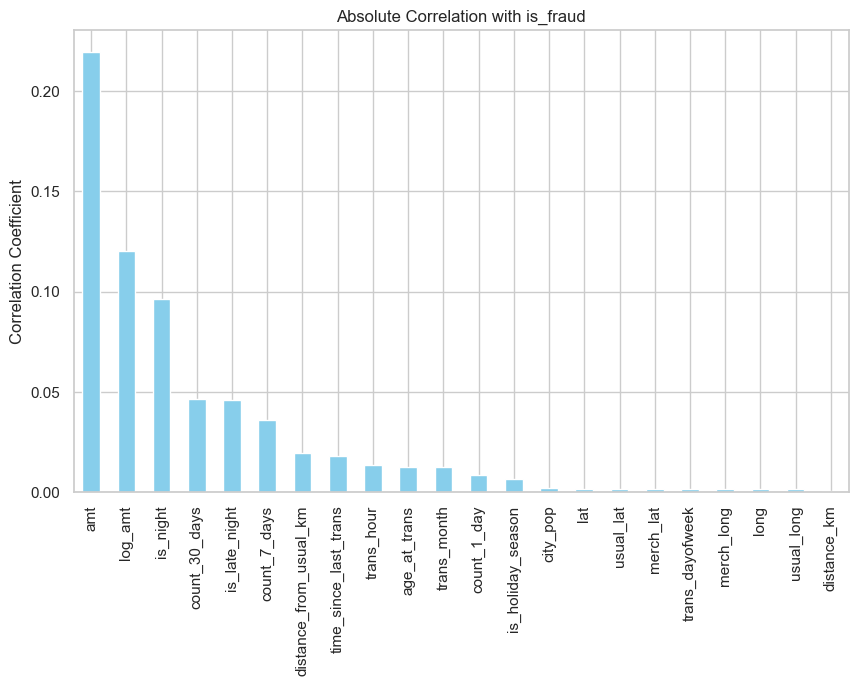

In [9]:
# Sorted absolute correlations with is_fraud
corr_with_fraud = df.corr(numeric_only=True)['is_fraud'].abs().sort_values(ascending=False)
print("Top correlations with is_fraud:\n", corr_with_fraud)

# Bar plot for visual
plt.figure(figsize=(10,6))
corr_with_fraud.drop('is_fraud').plot(kind='bar', color='skyblue')
plt.title('Absolute Correlation with is_fraud')
plt.ylabel('Correlation Coefficient')
plt.show()

### Key Insights from EDA (Full Dataset)

- **Fraud Rate**  
  Overall fraud rate is ~0.4–0.5%. Highly imbalanced, consistent with real-world credit card fraud scenarios.

- **Strongest Linear Predictors**  
  - Transaction amount (`amt`: 0.22, `log_amt`: 0.12) is the most strongly correlated feature with fraud confirming the dataset creator’s finding that amount is the top signal.  
  - Frequency features (`count_30_days`: 0.05, `count_7_days`: 0.04) and time since last transaction (-0.02) show only weak linear correlations in this dataset.

- **Time-of-Day Patterns**  
  Fraud rate shows a clear spike between **10pm and 3am**, aligning with known industry patterns of increased fraud during periods of lower monitoring and supervision.

- **Seasonal Patterns**  
  Small increases in fraud rate appear in **January and February**, with the lowest rates in **July**. No strong holiday (Nov–Dec) effect is visible in this simulation.

- **Transaction Distance**
  - Static distance from home (`distance_km`: correlation 0.0004) shows almost no linear relationship with fraud.  
  - Dynamic distance from recent usual location (`distance_from_usual_km`: correlation 0.0196) is slightly stronger, suggesting it captures behavioral anomalies better than static home distance — though still weak overall.

- **Transaction Amount Distribution**  
  Fraud cases tend to involve higher amounts, with wider spread and more outliers visible in boxplots.

- **Age Distribution**  
  The **60+ age group** shows the highest fraud rate (contrary to some external reports focusing on 30–39 volume). Average transaction amounts are similar across age bins.  
  **Ethical decision**: age features will be excluded from final modeling to avoid potential discrimination.

- **Merchant Category**  
  Highest fraud rates appear in **shopping_net**, **misc_net**, and **grocery_pos** — indicating online shopping and grocery purchases are common vectors for fraud in this dataset.

- **Comparison to Dataset Creator**  
  Adapted their rolling frequency approach. Amount remains the dominant feature as they reported, but frequency and recency signals are weaker in this analysis — possibly due to implementation differences or characteristics of the simulated data.

**Modeling Implications**  
Prioritize **amount**, **hour-of-day bins**, and **distance** as core features. Use tree-based models (e.g., XGBoost) to capture potential non-linear and interaction effects from weaker signals.